In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')

% matplotlib inline
%load_ext autoreload
% autoreload

In [2]:
data_am_noasso = pd.read_pickle('/data/ana_asso_2Hz_reci_MPEP')

In [3]:
data_am_noasso

,Before,After,File name,elimi
176,"{'resp2_region': [15032, 15033, 15034, 15035, ...","{'resp2_region': [15032, 15033, 15034, 15035, ...",2018052901,18
177,"{'resp2_region': [15032, 15033, 15034, 15035, ...","{'resp2_region': [15032, 15033, 15034, 15035, ...",2018052902,15
178,"{'resp2_region': [15032, 15033, 15034, 15035, ...","{'resp2_region': [15032, 15033, 15034, 15035, ...",2018053001,30
180,"{'resp2_region': [15032, 15033, 15034, 15035, ...","{'resp2_region': [15032, 15033, 15034, 15035, ...",2018053101,50
181,"{'resp2_region': [15032, 15033, 15034, 15035, ...","{'resp2_region': [15032, 15033, 15034, 15035, ...",2018053102,20
182,"{'resp2_region': [15032, 15033, 15034, 15035, ...","{'resp2_region': [15032, 15033, 15034, 15035, ...",2018053103,17


/src/Patch_ana/Patch_ana/patch_pip.py:500: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp_rm, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


<Container object of 3 artists>

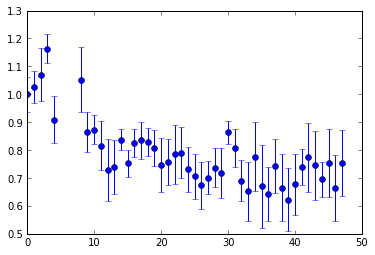

In [4]:
ave_ptl_resp = np.ones((len(data_am_noasso), 60))*np.nan

ave_ptl_mean_2,ave_ptl_ste_2, ave_ptl_2 = patch_pip.samp_ave(data_am_noasso, ave_ptl_resp)
ave_ptl_mean_2 = ave_ptl_mean_2[:-12]
ave_ptl_ste_2 = ave_ptl_ste_2[:-12]
ave_ptl_2 = ave_ptl_2[:, :-12]

plt.errorbar(x=np.arange(len(ave_ptl_mean_2)), y=ave_ptl_mean_2, yerr=ave_ptl_ste_2, fmt='bo')

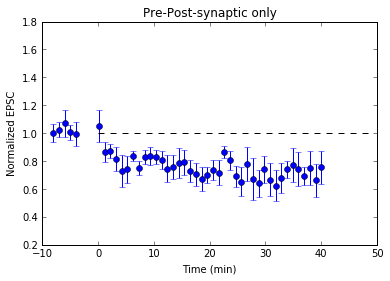

In [5]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_2, ave_ptl_ste_2
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.linspace(-6 * 4/3, len(ave_ptl_mean_2cp) - 6 * 4/3, len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='bo', label='2Hz (n={a})'.format(a=len(data_am_noasso)))

# ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_2, ave_ptl_ste_2
# ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
# ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
# plt.errorbar(x=np.linspace(-6 * 4/3, len(ave_ptl_mean_2cp) - 6 * 4/3, len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='bo', label='2Hz (n={a})'.format(a=len(asso2)))

plt.plot(np.ones((50))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
# plt.legend()
plt.ylim([0.2, 1.8])
plt.title('Pre-Post-synaptic only')

with PdfPages('/data/Figure4_11.pdf') as pdf:
    pdf.savefig()

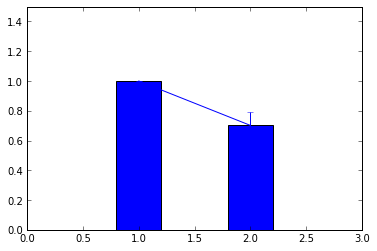

In [6]:
# Compare amplitude
mean_amp_aft_2Hz = np.nanmean(np.nanmean(ave_ptl_2[:, -10:], axis=1))

std_amp_aft_2Hz = np.nanstd(np.nanmean(ave_ptl_2[:, -10:], axis=1))/np.sqrt(6)
plt.bar([1,2], [1, mean_amp_aft_2Hz], align='center', width=0.4)
plt.errorbar(x=[1,2], y=[1, mean_amp_aft_2Hz],yerr = [0, std_amp_aft_2Hz], fmt='')
plt.ylim([0,1.5])
plt.xlim([0, 3])

with PdfPages('/data/Figure4_13.pdf') as pdf:
    pdf.savefig()

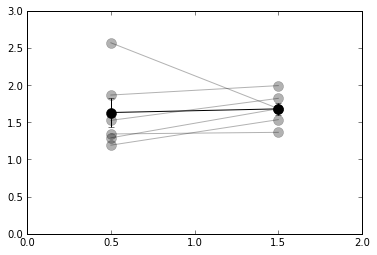

In [7]:
# Compare PPR
mean_PPR_bef = [np.nanmean(data_am_noasso['Before'].loc[i]['PPR']) for i in data_am_noasso['Before'].index]
mean_PPR_aft = [np.nanmean(data_am_noasso['After'].loc[i]['PPR'][-10:]) for i in data_am_noasso['After'].index]

mean_PPR_ave_bef = np.mean(mean_PPR_bef)
mean_PPR_std_bef = np.std(mean_PPR_bef)/np.sqrt(6)
mean_PPR_ave_aft = np.mean(mean_PPR_aft)
mean_PPR_std_aft = np.std(mean_PPR_aft)/np.sqrt(6)

for i, j in zip(mean_PPR_bef, mean_PPR_aft):
    plt.plot([0.5,1.5], [i, j], 'ko-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_PPR_ave_bef, mean_PPR_ave_aft], [mean_PPR_std_bef, mean_PPR_std_aft], fmt='k-o', markersize=10)
plt.xlim([0,2])
plt.ylim([0,3])
with PdfPages('/data/Supp3_3.pdf') as pdf:
    pdf.savefig()

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:26: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


[0, 60, 0.1, 1.7]

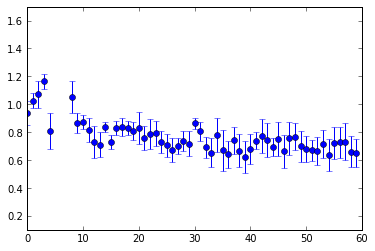

In [8]:
data = data_am_noasso
ave_ptl_resp = np.ones((len(data), 60))*np.nan

for i in range(len(data)):
    bef_resp = data.iloc[i]['Before']['ave_amp1'][-5:]
    bef_rs = np.nanmean(data.iloc[i]['Before']['rs'][-5:])
    aft_rs = np.nanmean(data.iloc[i]['After']['rs'][:(data.iloc[i]['elimi']-7)][-5:])
    aft_resp = data.iloc[i]['After']['ave_amp1'][:(data.iloc[i]['elimi']-7)]*aft_rs/bef_rs
    bef_mean = np.nanmean(bef_resp)
    if aft_resp.shape[0] < 52:
        length_fill = 52 - aft_resp.shape[0]
        mean_fill = np.nanmean(aft_resp[-5:])
        ste_fill =  np.nanstd(aft_resp[-5:])
        np.random.seed(i)
        aft_fill = np.random.normal(loc=mean_fill, scale=ste_fill, size=(1,length_fill))  
        aft_resp = np.concatenate((aft_resp, aft_fill.reshape(-1,1)))
    
    bef_resp = bef_resp/bef_mean
    aft_resp = aft_resp/bef_mean
    resp1_joint= np.concatenate([bef_resp, np.ones((3,1))*np.nan, aft_resp])
    ave_ptl_resp[i,:5] = bef_resp.reshape(1,-1)
    ave_ptl_resp[i,8:] = aft_resp[-52:].reshape(1,-1)
#   plt.figure()
#   plt.plot(resp1_joint, 'o', label='Resp 1')

ave_ptl_mean_2 = np.nanmean(ave_ptl_resp, axis=0)
ave_ptl_ste_2 = np.nanstd(ave_ptl_resp, axis=0)/np.sqrt(i)
plt.errorbar(x=np.arange(len(ave_ptl_mean_2)), y=ave_ptl_mean_2, yerr=ave_ptl_ste_2, fmt='bo')
plt.axis([0,60,0.1,1.7])

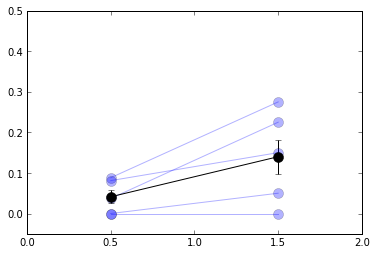

In [9]:
# Compare failure rate
mean_fail_bef = [np.sum(data_am_noasso['Before'].loc[i]['failure'])/len(data_am_noasso['Before'].loc[i]['failure']) for i in data_am_noasso['Before'].index]
mean_fail_aft = [np.sum(data_am_noasso['After'].loc[i]['failure'][-40:])/40 for i in data_am_noasso['After'].index]

mean_fail_bef.pop(-1)
mean_fail_aft.pop(-1)

mean_fail_ave_bef = np.mean(mean_fail_bef)
mean_fail_std_bef = np.std(mean_fail_bef)/np.sqrt(6)
mean_fail_ave_aft = np.mean(mean_fail_aft)
mean_fail_std_aft = np.std(mean_fail_aft)/np.sqrt(6)

for i, j in zip(mean_fail_bef, mean_fail_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_fail_ave_bef, mean_fail_ave_aft], [mean_fail_std_bef, mean_fail_std_aft], fmt='k-o', markersize=10)

plt.xlim([0,2])
plt.ylim([-0.05,0.5])

with PdfPages('/data/Figure4_15.pdf') as pdf:
    pdf.savefig()


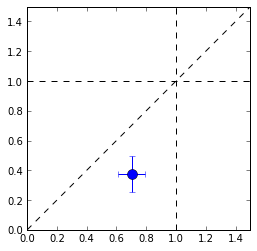

In [10]:
# CV analysis
cv_mean_bef = [np.nanmean(data_am_noasso['Before'].loc[i]['raw_amp1'][-20:]) for i in data_am_noasso['Before'].index]
cv_mean_aft = [np.nanmean(ave_ptl_2[i, -10:]) * cv_mean_bef[i] for i in range(ave_ptl_2.shape[0])]

cv_std_bef = [np.nanstd(data_am_noasso['Before'].loc[i]['raw_amp1'][-5:]) for i in data_am_noasso['Before'].index]
end_aft = [data_am_noasso['elimi'].values[i] for i in range(len(data_am_noasso))]
cv_std_aft = [np.nanstd(data_am_noasso['After'].loc[i]['raw_amp1'][max(end_aft[k]*3-70,0):end_aft[k]*3]) for k,i in enumerate(data_am_noasso['After'].index)]

r = [i ** 2/j ** 2 for i, j in zip([k/m for k, m in zip(cv_std_bef,cv_mean_bef)], [k/m for k, m in zip(cv_std_aft,cv_mean_aft)])]
pi = [i/j for i, j in zip(cv_mean_aft, cv_mean_bef)]

plt.errorbar(np.mean(pi), np.mean(r), np.std(r)/np.sqrt(len(r)), np.std(pi)/np.sqrt(len(pi)),  'o', markersize=10)

plt.plot(np.arange(0, 4, 0.5),np.arange(0, 4, 0.5), 'k--')
plt.plot(np.arange(0, 4, 0.5), np.ones(8),'k--')
plt.plot(np.ones(8),np.arange(0, 4, 0.5),'k--')
plt.xlim([0, 1.5])
plt.ylim([0, 1.5])
plt.axes().set_aspect('equal')
with PdfPages('/data/Figure4_16.pdf') as pdf:
    pdf.savefig()

In [11]:
# Perform processing on before amplitude
def pro_bef(data_mean, data_ste, scale=0.1):
    for i in range(len(data_mean)):
        if data_mean[i]+data_ste[i]<1:
            data_mean[i] = 1 - scale*data_ste[i]
        elif data_mean[i]-data_ste[i]>1:
            data_mean[i] = 1 + scale*data_ste[i]
            
    return data_mean, data_ste

[0, 60, 0.1, 1.7]

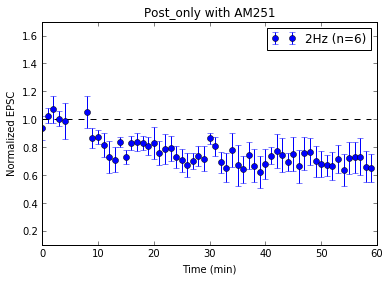

In [12]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_2, ave_ptl_ste_2
ave_ptl_mean, ave_ptl_ste = pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='bo', label='2Hz (n={a})'.format(a=len(data)))
plt.plot(np.ones((60))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
plt.legend()
plt.title('Post_only with AM251')
plt.axis([0,60,0.1,1.7])